# Letter Recognition with Neural Networks

In this project, we build a feedforward neural network (FNN) to classify handwritten digits (0-9) from the MNIST dataset. The MNIST dataset consists of 70,000 grayscale images of size 28x28 pixels, divided into 60,000 training and 10,000 testing samples. Each image contains a single handwritten digit, and our goal is to build a model that can correctly classify these digits.

We use TensorFlow and Keras to design, train, and evaluate the model. The model takes flattened pixel values as input, processes them through multiple layers, and outputs the probability distribution over the 10 digit classes (0-9).

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels Shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data Shape: (60000, 784), Labels Shape: (60000, 10)
Testing Data Shape: (10000, 784), Labels Shape: (10000, 10)


Each pixel value originally ranges from 0 to 255. We apply feature scaling using StandardScaler() to normalize the values to mean 0 and variance 1 for better training stability.

Finally, we one-hot encode the labels to convert them into a format suitable for multi-class classification.

In [3]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7865 - loss: 0.7042 - val_accuracy: 0.9454 - val_loss: 0.1866
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9179 - loss: 0.2909 - val_accuracy: 0.9580 - val_loss: 0.1513
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9337 - loss: 0.2282 - val_accuracy: 0.9638 - val_loss: 0.1336
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9400 - loss: 0.2097 - val_accuracy: 0.9663 - val_loss: 0.1238
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9454 - loss: 0.1809 - val_accuracy: 0.9635 - val_loss: 0.1231
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9495 - loss: 0.1675 - val_accuracy: 0.9695 - val_loss: 0.1143
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9538 - loss: 0.1550 - val_accuracy: 0.9663 - val_loss: 0.1178
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9551 - loss: 

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 97.16%


In [6]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0     0.9729    0.9878    0.9803       980
           1     0.9903    0.9894    0.9899      1135
           2     0.9671    0.9690    0.9681      1032
           3     0.9723    0.9743    0.9733      1010
           4     0.9793    0.9623    0.9707       982
           5     0.9578    0.9675    0.9626       892
           6     0.9729    0.9749    0.9739       958
           7     0.9625    0.9747    0.9686      1028
           8     0.9609    0.9589    0.9599       974
           9     0.9767    0.9544    0.9654      1009

    accuracy                         0.9716     10000
   macro avg     0.9713    0.9713    0.9713     10000
weighted avg     0.9716    0.9716    0.9716     10000



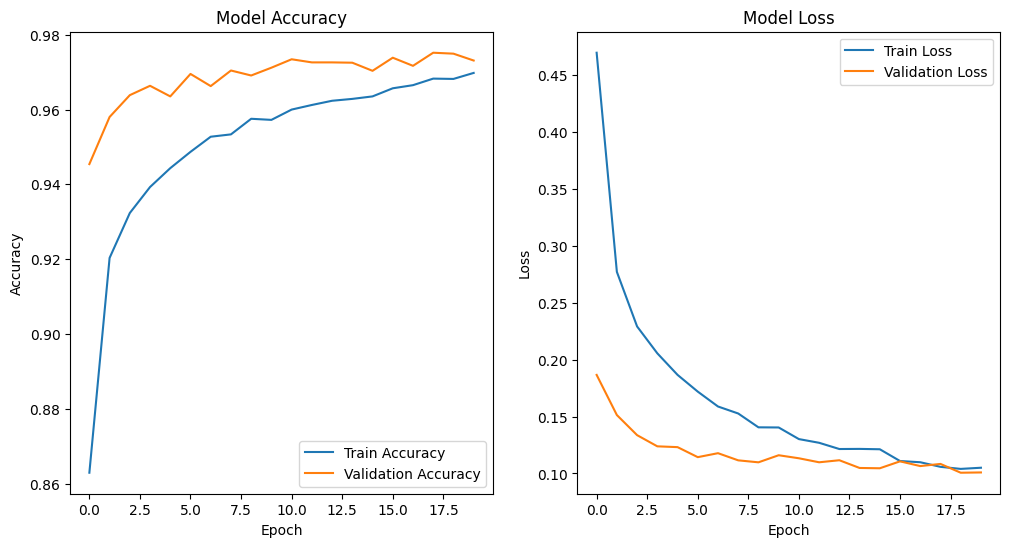

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
model.save("mnist_digit_classifier.h5")